https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
df = pd.read_csv('bank.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
tar_col = 'y'
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols.remove(tar_col)
num_cols, cat_cols,tar_col

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 'y')

In [ ]:
df[num_cols]

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [ ]:
df[cat_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


# Exploratory Data Analysis


## Analyze Target

In [ ]:
df['y'].value_counts(dropna=False), df['y'].value_counts(dropna=False, normalize=True)

(y
 no     4000
 yes     521
 Name: count, dtype: int64,
 y
 no     0.88476
 yes    0.11524
 Name: proportion, dtype: float64)

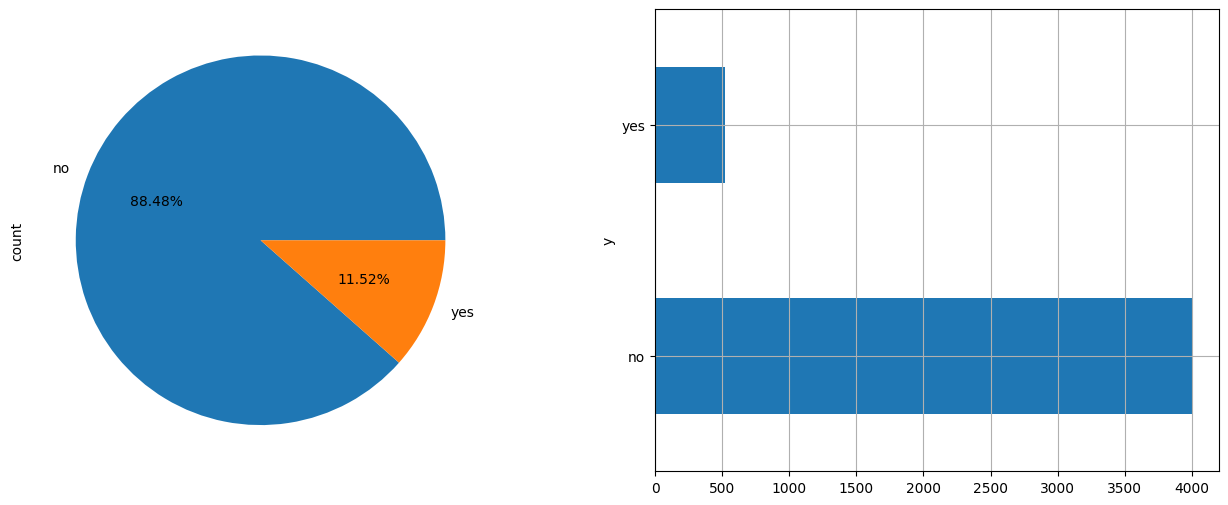

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,6))
df[tar_col].value_counts().plot(kind='pie',ax=axs[0], autopct='%.2f%%')
df[tar_col].value_counts().sort_index().plot(kind='barh',ax=axs[1])
plt.grid()
plt.show()

In [ ]:
df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

## Data Quality

In [ ]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = pd.DataFrame({'missing_percent': missing_percent})
print("Các cột có tỷ lệ missing cao nhất:")
missing_summary[missing_summary['missing_percent'] > 0]

Các cột có tỷ lệ missing cao nhất:


,missing_percent


No missing data

In [ ]:
nunique = df.nunique()
constant_cols = nunique[nunique == 1]
print("\nCác cột có giá trị duy nhất (constant columns):")
constant_cols


Các cột có giá trị duy nhất (constant columns):


Series([], dtype: int64)

No constant column

In [ ]:
n_duplicates = df.duplicated().sum()
print(f"\nSố lượng dòng trùng lặp trong df: {n_duplicates}")


Số lượng dòng trùng lặp trong df: 0


No duplicated rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [ ]:
# Descriptive statistic
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
cat_df_info = []
for cat in cat_cols:
    cat_df_info.append({
        'column': cat,
        'unique_values': df[cat].nunique(),
        'sample_values': df[cat].dropna().unique()[:5],
        })

cat_df_info = pd.DataFrame(cat_df_info)
cat_df_info

,column,unique_values,sample_values
0,job,12,"[unemployed, services, management, blue-collar..."
1,marital,3,"[married, single, divorced]"
2,education,4,"[primary, secondary, tertiary, unknown]"
3,default,2,"[no, yes]"
4,housing,2,"[no, yes]"
5,loan,2,"[no, yes]"
6,contact,3,"[cellular, unknown, telephone]"
7,month,12,"[oct, may, apr, jun, feb]"
8,poutcome,4,"[unknown, failure, other, success]"


## Analysis Relationship

### Age - Numerical

<Axes: xlabel='age', ylabel='Density'>

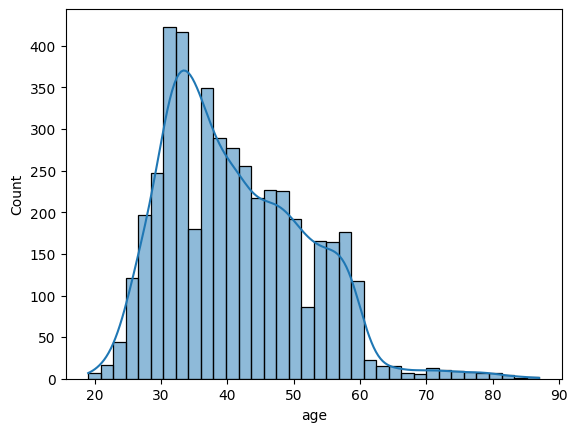

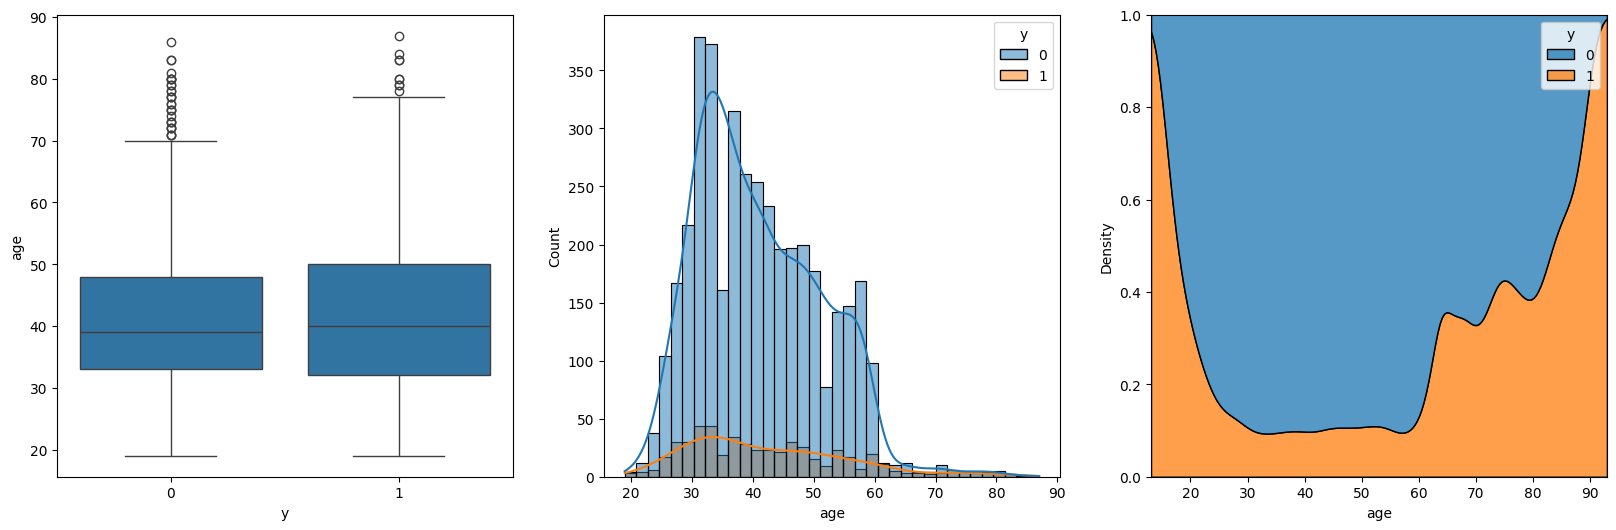

In [ ]:
tar_num_col = 'age'
sns.histplot(df, x=tar_num_col, kde=True)
f, axs = plt.subplots(1,3,figsize=(20, 6))
# Area plot with percentage (comparison between Segmentation)
sns.boxplot(data=df, x=tar_col, y=tar_num_col, ax=axs[0])
sns.histplot(data=df, x=tar_num_col, hue=tar_col,  kde=True, ax=axs[1])
sns.kdeplot(data=df, x=tar_num_col, hue=tar_col, multiple='fill', ax=axs[2])

### Job - Categorical

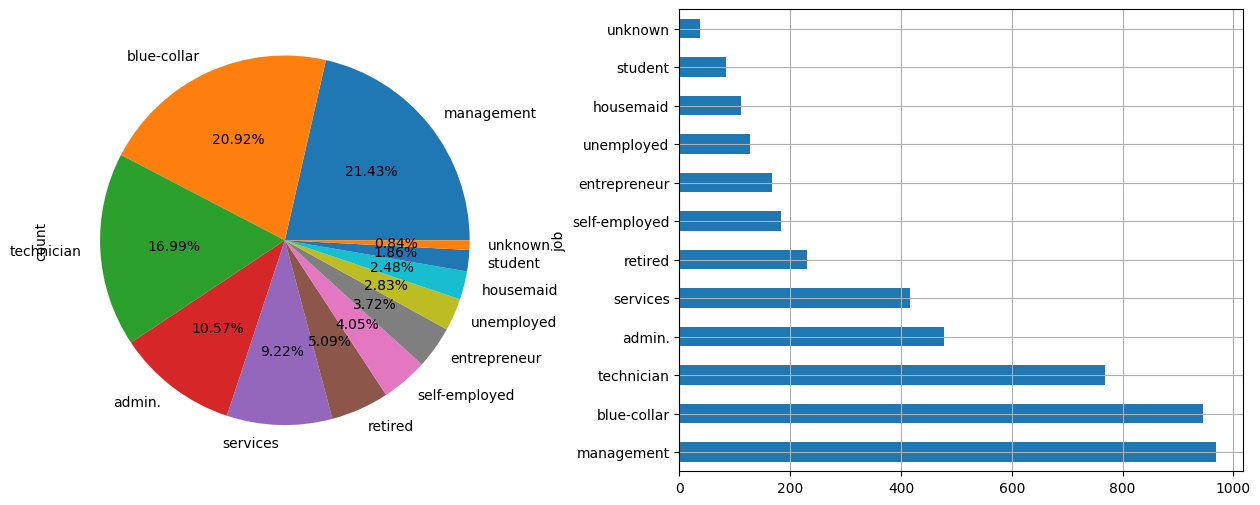

In [ ]:
f, axs = plt.subplots(1,2,figsize=(16, 6))
df['job'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=axs[0])
df['job'].value_counts().plot(kind='barh', ax=axs[1])
plt.grid()
plt.show()

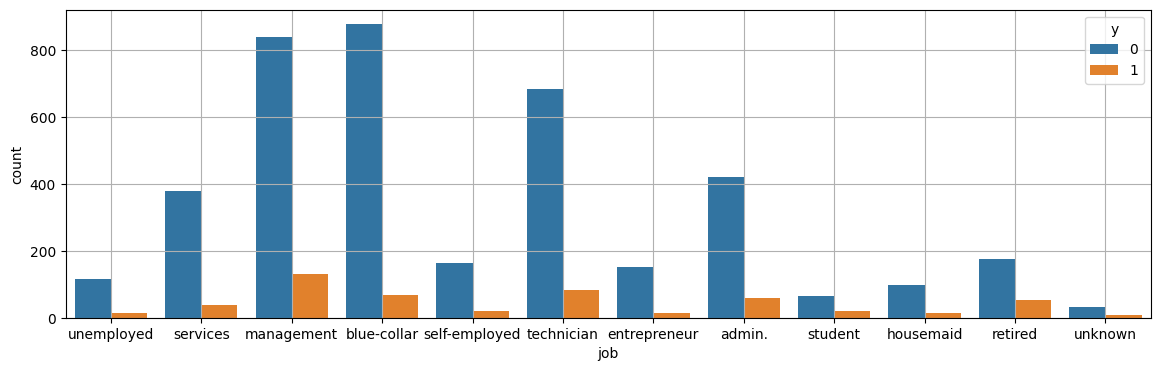

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(data=df, x='job', hue=tar_col)
plt.grid()

### Correlation

<Axes: >

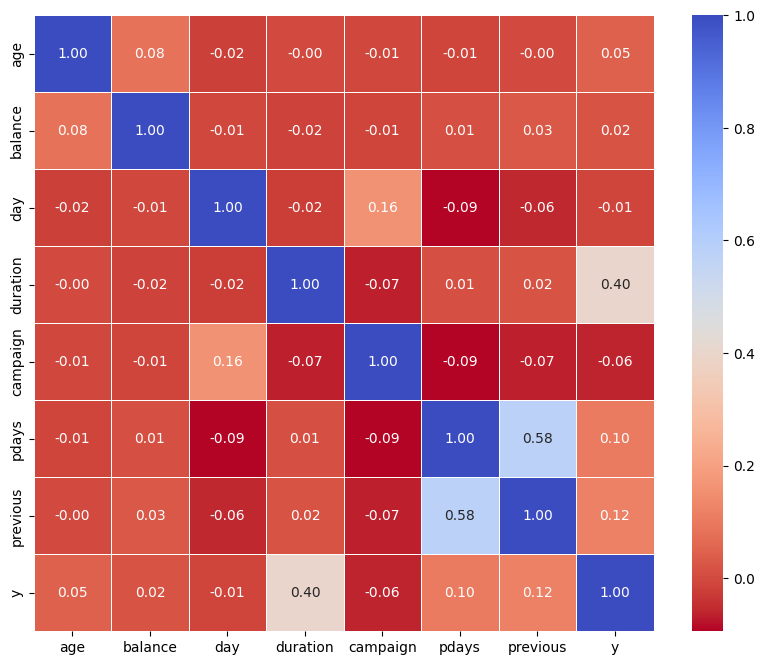

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

# Entire DataFrame
corr = df[num_cols + [tar_col]].corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1, annot=True, fmt='.2f', linewidths=0.5, linecolor='white')

In [ ]:
corr['y'].sort_values()[::-1]

y           1.000000
duration    0.401118
previous    0.116714
pdays       0.104087
age         0.045092
balance     0.017905
day        -0.011244
campaign   -0.061147
Name: y, dtype: float64

Correlation Analysis with Target y:

duration shows strongest correlation (~0.40) but causes data leakage since call duration is known only after the outcome. Should be excluded in production models.
Other numerical features (age, balance, pdays, previous) have weak correlations (<0.12), indicating they play supporting rather than decisive roles in subscription decisions.
campaign has slight negative correlation, suggesting more contact attempts reduce subscription likelihood, possibly due to customer annoyance.

In [ ]:
# df = df.drop(columns=['duration'])
# df

# Prepare for modeling


In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
X_train, y_train = train.drop(columns=['y']), train['y']
X_test, y_test = test.drop(columns=['y']), test['y']

In [ ]:
X_train.shape, y_train.shape

((3164, 16), (3164,))

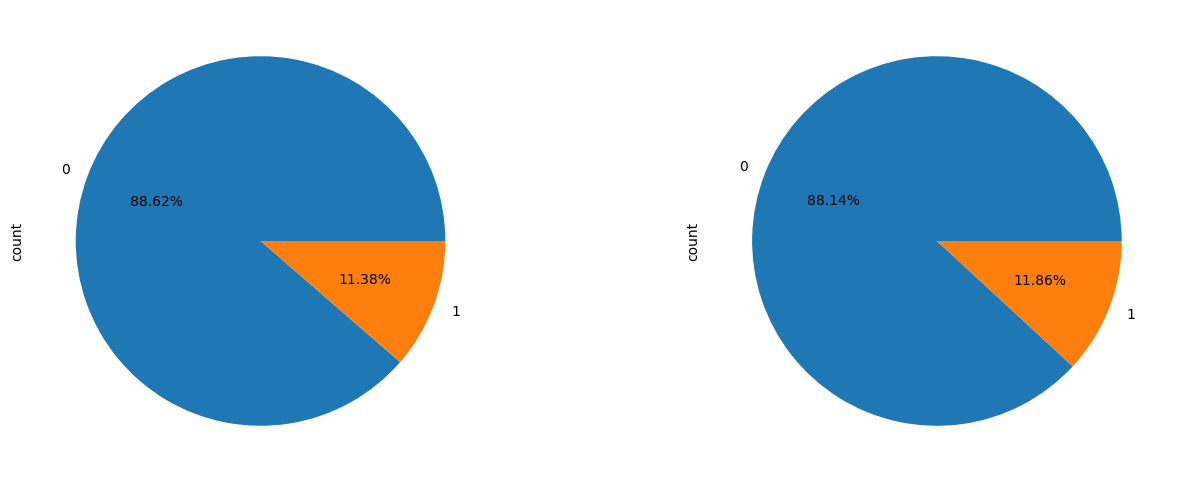

In [ ]:
f, axs = plt.subplots(1,2, figsize=(16,6))
pd.Series(y_train).value_counts().plot(kind='pie', autopct='%.2f%%', ax=axs[0])
pd.Series(y_test).value_counts().plot(kind='pie', autopct='%.2f%%', ax=axs[1])
plt.show()

In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2451,57,admin.,married,secondary,no,3927,no,no,cellular,13,oct,61,1,-1,0,unknown
1564,28,blue-collar,divorced,unknown,no,101,yes,no,unknown,28,may,126,4,-1,0,unknown
1020,42,technician,married,secondary,no,994,yes,no,cellular,11,aug,149,1,78,5,failure
866,54,retired,married,secondary,no,3671,no,no,unknown,11,jun,67,3,-1,0,unknown
373,51,technician,married,secondary,no,-379,yes,no,cellular,5,aug,261,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,36,blue-collar,married,secondary,no,141,yes,no,unknown,23,may,106,3,-1,0,unknown
2635,30,technician,married,secondary,no,616,yes,no,cellular,6,may,19,1,-1,0,unknown
2312,34,admin.,married,secondary,no,50,yes,no,unknown,20,may,89,2,-1,0,unknown
1834,57,management,married,tertiary,no,0,yes,no,cellular,21,nov,67,1,-1,0,unknown


In [ ]:
y_train

2451    0
1564    0
1020    1
866     0
373     0
       ..
2798    0
2635    0
2312    0
1834    0
1714    0
Name: y, Length: 3164, dtype: int64

In [ ]:
X_test.shape, y_test.shape

((1357, 16), (1357,))

In [ ]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1633,59,blue-collar,married,primary,no,699,no,no,cellular,28,jan,98,1,154,6,failure
2859,23,blue-collar,single,primary,no,8627,yes,no,cellular,15,may,169,1,346,1,failure
1267,36,unemployed,married,secondary,no,-129,yes,no,cellular,29,jul,121,3,-1,0,unknown
1323,46,blue-collar,married,primary,no,91,yes,no,cellular,6,may,29,1,356,2,failure
3371,49,unemployed,married,tertiary,no,-471,yes,no,cellular,20,nov,77,3,185,7,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,42,admin.,married,secondary,no,0,no,no,unknown,19,jun,370,1,-1,0,unknown
3919,44,housemaid,married,tertiary,no,460,no,no,unknown,17,jun,491,1,-1,0,unknown
3145,45,technician,divorced,secondary,no,976,yes,no,cellular,17,apr,183,1,338,2,failure
4033,37,management,married,tertiary,no,3288,no,no,cellular,8,aug,124,2,-1,0,unknown


In [ ]:
y_test

1633    0
2859    0
1267    0
1323    0
3371    0
       ..
2291    0
3919    0
3145    0
4033    0
3930    1
Name: y, Length: 1357, dtype: int64

In [ ]:
# num_cols.remove('duration')

In [ ]:
X_train = X_train[num_cols].values
X_test = X_test[num_cols].values
y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train

array([[  57, 3927,   13, ...,    1,   -1,    0],
       [  28,  101,   28, ...,    4,   -1,    0],
       [  42,  994,   11, ...,    1,   78,    5],
       ...,
       [  34,   50,   20, ...,    2,   -1,    0],
       [  57,    0,   21, ...,    1,   -1,    0],
       [  57,    0,    5, ...,    8,   -1,    0]])

In [ ]:
X_test

array([[  59,  699,   28, ...,    1,  154,    6],
       [  23, 8627,   15, ...,    1,  346,    1],
       [  36, -129,   29, ...,    3,   -1,    0],
       ...,
       [  45,  976,   17, ...,    1,  338,    2],
       [  37, 3288,    8, ...,    2,   -1,    0],
       [  51, 1679,   12, ...,    1,  365,    9]])

# Model: Logistic Regression

In [ ]:
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation on testset

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_prob

array([[0.9366053 , 0.0633947 ],
       [0.82370988, 0.17629012],
       [0.94617737, 0.05382263],
       ...,
       [0.91951397, 0.08048603],
       [0.90570405, 0.09429595],
       [0.61839828, 0.38160172]])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Result

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1196
           1       0.50      0.12      0.19       161

    accuracy                           0.88      1357
   macro avg       0.70      0.55      0.56      1357
weighted avg       0.85      0.88      0.85      1357



In [ ]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {acc * 100:.2f}')
print(f'Precision: {pre* 100:.2f}, Recall: {rec* 100:.2f}, F1-score: {f1* 100:.2f}')

Accuracy: 88.14
Precision: 50.00, Recall: 11.80, F1-score: 19.10


In [ ]:
con_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
tn, fp, fn, tp = con_mat.ravel()

In [ ]:
tn, fp, fn, tp

(1177, 19, 142, 19)

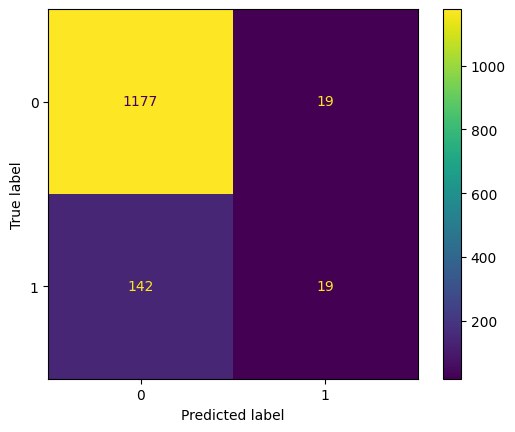

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=model.classes_)
disp.plot()

## ROC-AUC

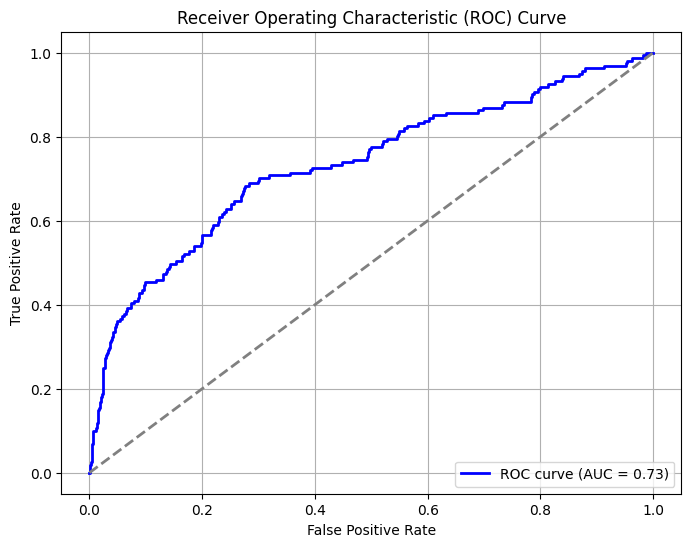

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
df.shape

(4521, 17)

## Vintage Tabel & Lift

In [ ]:
# 1. Get predicted probabilities for the positive class
prob = y_prob[:, 1]

# 2. Create 10 bins (deciles) based on predicted probability
df_vintage = pd.DataFrame({'prob': prob, 'actual': y_test})
df_vintage['bin'] = pd.qcut(df_vintage['prob'], 10, labels=False, duplicates='drop')
df_vintage.sort_values(by='prob')

,prob,actual,bin
330,0.000469,0,0
65,0.003188,0,0
1141,0.005235,0,0
1254,0.005691,0,0
287,0.006226,0,0
...,...,...,...
579,0.906528,0,9
723,0.911674,1,9
1147,0.956306,1,9
249,0.983386,1,9


In [ ]:
# 3. Aggregate by bin
vintage_table = df_vintage.groupby('bin').agg(
    total=('actual', 'count'),
    num_action=('actual', 'sum'),
    min_prob=('prob', 'min'),
    avg_prob=('prob', 'mean'),
    max_prob=('prob', 'max')
).reset_index()
vintage_table['num_not_action'] = vintage_table['total'] - vintage_table['num_action']
vintage_table['action_rate'] = vintage_table['num_action'] / vintage_table['total']
vintage_table = vintage_table[['bin', 'total', 'num_action', 'num_not_action', 'min_prob', 'avg_prob', 'max_prob', 'action_rate']]
vintage_table

,bin,total,num_action,num_not_action,min_prob,avg_prob,max_prob,action_rate
0,0,136,6,130,0.000469,0.022607,0.033021,0.044118
1,1,136,10,126,0.033129,0.039760,0.045736,0.073529
2,2,135,7,128,0.045786,0.052619,0.059295,0.051852
3,3,136,5,131,0.059532,0.066839,0.074042,0.036765
4,4,136,14,122,0.074422,0.081831,0.089515,0.102941
5,5,135,4,131,0.089785,0.098346,0.108976,0.029630
6,6,136,12,124,0.109107,0.120815,0.134041,0.088235
7,7,135,22,113,0.134245,0.154052,0.176552,0.162963
8,8,136,20,116,0.177356,0.210827,0.258650,0.147059
9,9,136,61,75,0.260053,0.445832,0.985167,0.448529


In [ ]:
# 4. Calculate response rate and lift
overall_rate = df_vintage['actual'].mean()
print(overall_rate)
vintage_table['overall_rate'] = overall_rate
vintage_table

0.11864406779661017


,bin,total,num_action,num_not_action,min_prob,avg_prob,max_prob,action_rate,overall_rate
0,0,136,6,130,0.000469,0.022607,0.033021,0.044118,0.118644
1,1,136,10,126,0.033129,0.039760,0.045736,0.073529,0.118644
2,2,135,7,128,0.045786,0.052619,0.059295,0.051852,0.118644
3,3,136,5,131,0.059532,0.066839,0.074042,0.036765,0.118644
4,4,136,14,122,0.074422,0.081831,0.089515,0.102941,0.118644
5,5,135,4,131,0.089785,0.098346,0.108976,0.029630,0.118644
6,6,136,12,124,0.109107,0.120815,0.134041,0.088235,0.118644
7,7,135,22,113,0.134245,0.154052,0.176552,0.162963,0.118644
8,8,136,20,116,0.177356,0.210827,0.258650,0.147059,0.118644
9,9,136,61,75,0.260053,0.445832,0.985167,0.448529,0.118644


In [ ]:
vintage_table['lift'] = vintage_table['action_rate'] / overall_rate
# 5. Sort bins from highest to lowest probability
vintage_table = vintage_table.sort_values('bin', ascending=False).reset_index(drop=True)
vintage_table

,bin,total,num_action,num_not_action,min_prob,avg_prob,max_prob,action_rate,overall_rate,lift
0,9,136,61,75,0.260053,0.445832,0.985167,0.448529,0.118644,3.780462
1,8,136,20,116,0.177356,0.210827,0.258650,0.147059,0.118644,1.239496
2,7,135,22,113,0.134245,0.154052,0.176552,0.162963,0.118644,1.373545
3,6,136,12,124,0.109107,0.120815,0.134041,0.088235,0.118644,0.743697
4,5,135,4,131,0.089785,0.098346,0.108976,0.029630,0.118644,0.249735
5,4,136,14,122,0.074422,0.081831,0.089515,0.102941,0.118644,0.867647
6,3,136,5,131,0.059532,0.066839,0.074042,0.036765,0.118644,0.309874
7,2,135,7,128,0.045786,0.052619,0.059295,0.051852,0.118644,0.437037
8,1,136,10,126,0.033129,0.039760,0.045736,0.073529,0.118644,0.619748
9,0,136,6,130,0.000469,0.022607,0.033021,0.044118,0.118644,0.371849


In [ ]:
# Highlight 2 columns 'action_rate' and 'lift' from highest to lowest in vintage_table
def highlight_max_to_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    styles = []
    for v in s:
        if v == s.max():
            styles.append('background-color: #ffeb3b; font-weight: bold')  # highlight max (yellow)
        elif v == s.min():
            styles.append('background-color: #e0e0e0;')  # highlight min (gray)
        else:
            styles.append('')
    return styles

vintage_table.style.apply(highlight_max_to_min, subset=['action_rate', 'lift'])

,bin,total,num_action,num_not_action,min_prob,avg_prob,max_prob,action_rate,overall_rate,lift
0,9,136,61,75,0.260053,0.445832,0.985167,0.448529,0.118644,3.780462
1,8,136,20,116,0.177356,0.210827,0.258650,0.147059,0.118644,1.239496
2,7,135,22,113,0.134245,0.154052,0.176552,0.162963,0.118644,1.373545
3,6,136,12,124,0.109107,0.120815,0.134041,0.088235,0.118644,0.743697
4,5,135,4,131,0.089785,0.098346,0.108976,0.029630,0.118644,0.249735
5,4,136,14,122,0.074422,0.081831,0.089515,0.102941,0.118644,0.867647
6,3,136,5,131,0.059532,0.066839,0.074042,0.036765,0.118644,0.309874
7,2,135,7,128,0.045786,0.052619,0.059295,0.051852,0.118644,0.437037
8,1,136,10,126,0.033129,0.039760,0.045736,0.073529,0.118644,0.619748
9,0,136,6,130,0.000469,0.022607,0.033021,0.044118,0.118644,0.371849


# Recommended Business Strategy

- Focus on top 30% customers (bins 7-9) with 14-45% conversion rates vs 12% baseline
- Prioritize bin 9 for highest ROI (44.8% conversion, 3.8x lift)